# MLOps와 머신러닝 엔지니어링 
- 지속적 통합, 지속적 전달, 마이크로 서비스, 코드형 인프라(JaC), 모니터링과 로깅, 커뮤니케이션 및 협업

### 머신러닝이란 무엇인가?
- 알고리즘을 사용해 데이터로부터 자동으로 학습하는 방법 
- supervised, semi-supervised, unsupervised, reinforcement 네 가지 방법 

### supervised machine learning
- 정답이 이미 알려져 있고 표시가 되어 있음
- ex) 몸무게로부터 키를 예측, target = 키, feature = 몸무게 
- 데이터 셋 : 18세 청소년들의 키와 몸무게 25,000개의 종합 기록 

In [6]:
import pandas as pd 

#df = pd.read_csv("../Python_for_Devops/data/height-weight-25k.csv")
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/\
regression-concepts/master/\
height-weight-25k.csv")
df.head()

,Index,Height-Inches,Weight-Pounds
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


### EDA (탐색적 데이터 분석)
- 데이터를 보고 무엇을 탐색할 수 있는지 확인 

c:\Users\jswoo\Desktop\Repository\Python_for_Devops\devops_venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


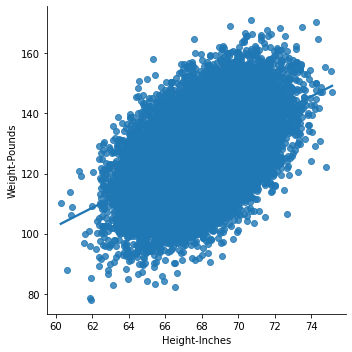

In [7]:
import seaborn as sns
import numpy as np 

sns.lmplot("Height-Inches", "Weight-Pounds", data = df)

In [8]:
df.describe()

,Index,Height-Inches,Weight-Pounds
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


c:\Users\jswoo\Desktop\Repository\Python_for_Devops\devops_venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


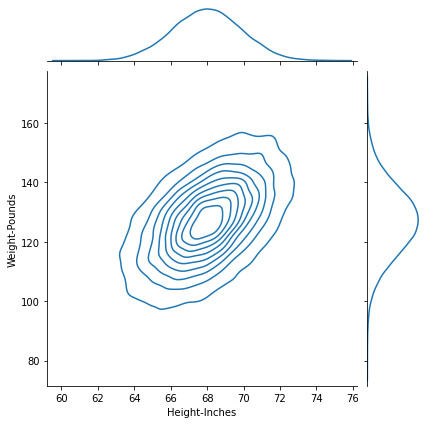

In [9]:
# 커널 밀도 분포 
# - 두 변수가 서로 어떻게 연관되어 있는지 보여줌 
sns.jointplot("Height-Inches", "Weight-Pounds", data = df, kind = "kde")

### 모델링 
- 머신러닝에서 모델링은 알고리즘이 데이터로부터 학습하는 것 
- 과거 데이터를 사용해 미래 데이터를 예측 

In [10]:
# sklearn 회귀 모델 
# 데이터는 피처와 타깃으로 추출된 다음 학습과 테스트 세트로 분리
from sklearn.model_selection import train_test_split 

# 피치와 타깃 추출 및 검사 
# 타깃과 피처 변수를 명시적으로 추출해 하나의 셀에 재구성하는 것이 좋음 
# 그 다음 모양을 점검하여 sklearn을 사용해 프로퍼티 디멘션인지 확인 가능 
y = df['Weight-Pounds'].values # Target
y = y.reshape(-1, 1)
x = df['Height-Inches'].values # Feature(s)
x = x.reshape(-1, 1)

y.shape

(25000, 1)

In [12]:
# 데이터는 80/20으로 나눔 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(20000, 1) (5000, 1)
(20000, 1) (5000, 1)


In [13]:
# 모델 만들기 
# LinearRegression 알고리즘을 사용해 모델 구현
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
model = lm.fit(x_train, y_train)
y_predicted = lm.predict(x_test)

In [14]:
# LinearRegression 정확도 출력 
from sklearn.metrics import mean_squared_error 
from math import sqrt 

# RMSE Mean Squared Error 
rms = sqrt(mean_squared_error(y_predicted, y_test))
rms 

10.131797045462179

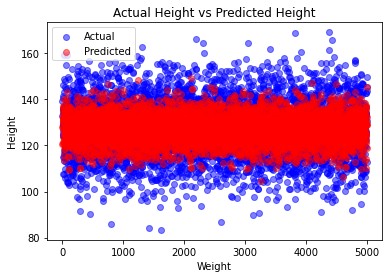

In [15]:
# 예측 키 대 실제 키 표시
# 예측 키 대 실제 키를 그래프로 표시해 이 모형이 예측에서 얼마나 잘 수행되는지 확인 
import matplotlib.pyplot as plt 
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y = y_test, c = 'blue', label = 'Actual', alpha = 0.5)
ax.scatter(x = range(0, y_predicted.size), y = y_predicted, c = 'red', label = 'Predicted', alpha = 0.5)

plt.title('Actual Height vs Predicted Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()